In [2]:
import pandas as pd
subjects = ['Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Alice', 'Bob', 'Bob', 'Bob', 'Bob', 'Bob', 'Bob', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'Charlie', 'David', 'David', 'David', 'David', 'David', 'David', 'Eve', 'Eve', 'Eve', 'Eve', 'Eve', 'Eve']
predicates = ['friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation', 'friend_with', 'friend_with', 'has_hobby', 'has_hobby', 'has_occupation', 'has_occupation']
objects = ['Bob', 'Charlie', 'Reading', 'Swimming', 'Engineer', 'Scientist', 'Alice', 'David', 'Football', 'Cycling', 'Doctor', 'Chef', 'Alice', 'Eve', 'Gaming', 'Photography', 'Teacher', 'Lawyer', 'Bob', 'Frank', 'Swimming', 'Hiking', 'Lawyer', 'Pilot', 'Charlie', 'Frank', 'Painting', 'Running', 'Chef', 'Nurse']


df = pd.DataFrame({'subject': subjects, 'predicate': predicates, 'object': objects})
df.to_csv('dataset30.tsv', sep='\t', index=False)
df

,subject,predicate,object
0,Alice,friend_with,Bob
1,Alice,friend_with,Charlie
2,Alice,has_hobby,Reading
3,Alice,has_hobby,Swimming
4,Alice,has_occupation,Engineer
5,Alice,has_occupation,Scientist
6,Bob,friend_with,Alice
7,Bob,friend_with,David
8,Bob,has_hobby,Football
9,Bob,has_hobby,Cycling


In [3]:
from pykeen.triples import TriplesFactory

# Assuming your dataframe has columns 'subject', 'predicate', 'object'
triples_factory = TriplesFactory.from_labeled_triples(
    triples=df[['subject', 'predicate', 'object']].values,
)

# training, validation, testing = triples_factory.split(ratios=(.6, .2, .2))
training = triples_factory
validation = triples_factory
testing = triples_factory

d=training
id_to_entity={v: k for k, v in d.entity_to_id.items()}
id_to_relation={v: k for k, v in d.relation_to_id.items()}

for i in d.map_triples(d.triples):
    s,p,o =int(i[0]), int(i[1]), int(i[2])
    h,r,t = id_to_entity[s], id_to_relation[p], id_to_entity[o]
    print(f"{s:2d}:{h:7}{p:2d}:{r:7} {o:2d}:{t:7}")

/home/wasit/miniconda3/envs/pykeen-tutorials/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Reconstructing all label-based triples. This is expensive and rarely needed.


 0:Alice   0:friend_with  1:Bob    
 0:Alice   0:friend_with  2:Charlie
 0:Alice   1:has_hobby 18:Reading
 0:Alice   1:has_hobby 21:Swimming
 0:Alice   2:has_occupation  7:Engineer
 0:Alice   2:has_occupation 20:Scientist
 1:Bob     0:friend_with  0:Alice  
 1:Bob     0:friend_with  5:David  
 1:Bob     1:has_hobby  4:Cycling
 1:Bob     1:has_hobby  9:Football
 1:Bob     2:has_occupation  3:Chef   
 1:Bob     2:has_occupation  6:Doctor 
 2:Charlie 0:friend_with  0:Alice  
 2:Charlie 0:friend_with  8:Eve    
 2:Charlie 1:has_hobby 11:Gaming 
 2:Charlie 1:has_hobby 16:Photography
 2:Charlie 2:has_occupation 13:Lawyer 
 2:Charlie 2:has_occupation 22:Teacher
 5:David   0:friend_with  1:Bob    
 5:David   0:friend_with 10:Frank  
 5:David   1:has_hobby 12:Hiking 
 5:David   1:has_hobby 21:Swimming
 5:David   2:has_occupation 13:Lawyer 
 5:David   2:has_occupation 17:Pilot  
 8:Eve     0:friend_with  2:Charlie
 8:Eve     0:friend_with 10:Frank  
 8:Eve     1:has_hobby 15:Painting
 8:Eve     

INFO:pykeen.pipeline.api:Using device: None
Training epochs on cpu: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:04<00:00, 11.81epoch/s, loss=0.597, prev_loss=0.611]
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No evaluation batch_size provided. Setting batch_size to '32'.
Evaluating on cpu: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 30.0/30.0 [00:00<00:00, 885triple/s]
INFO:pykeen.evaluation.evaluator:Evaluation took 0.04s seconds
INFO:pykeen.evaluation.evaluator:Currently automatic memory optimization only supports GPUs, but you're using a CPU. Therefore, the batch_size will be set to the default value.
INFO:pykeen.evaluation.evaluator:No

              Hits@1: 0.33
              Hits@3: 0.95
              Hits@5: 0.98
             Hits@10: 1.00
Mean Reciprocal Rank: 0.61


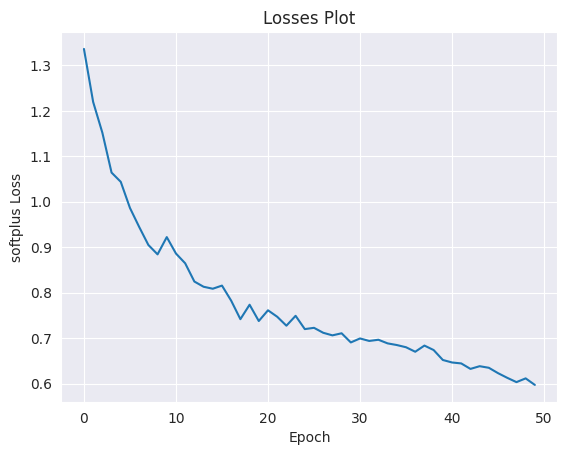

In [16]:
from pykeen.pipeline import pipeline



result = pipeline(
    model='TransE',
    loss="softplus",
    training=training,
    testing=testing,
    validation=validation,
    model_kwargs=dict(embedding_dim=3, random_seed=42),  # Increase the embedding dimension
    optimizer_kwargs=dict(lr=0.1),  # Adjust the learning rate
    training_kwargs=dict(num_epochs=50, use_tqdm_batch=False),  # Increase the number of epochs
)

# The trained model is stored in the pipeline result
model = result.model

#plot loss
result.plot_losses()

from pykeen.evaluation import RankBasedEvaluator
# The result object also contains the evaluation metrics result.metric_results.to_df()

# Create an evaluator
evaluator = RankBasedEvaluator()

# Evaluate the model
metrics = evaluator.evaluate(result.model, testing.mapped_triples, additional_filter_triples=[training.mapped_triples, validation.mapped_triples])

# Print the metrics
print(f"              Hits@1: {metrics.get_metric('hits@1'):0.2f}")
print(f"              Hits@3: {metrics.get_metric('hits@3'):0.2f}")
print(f"              Hits@5: {metrics.get_metric('hits@5'):0.2f}")
print(f"             Hits@10: {metrics.get_metric('hits@10'):0.2f}")
print(f"Mean Reciprocal Rank: {metrics.get_metric('mean_reciprocal_rank'):0.2f}")

(-1.0, 1.0)

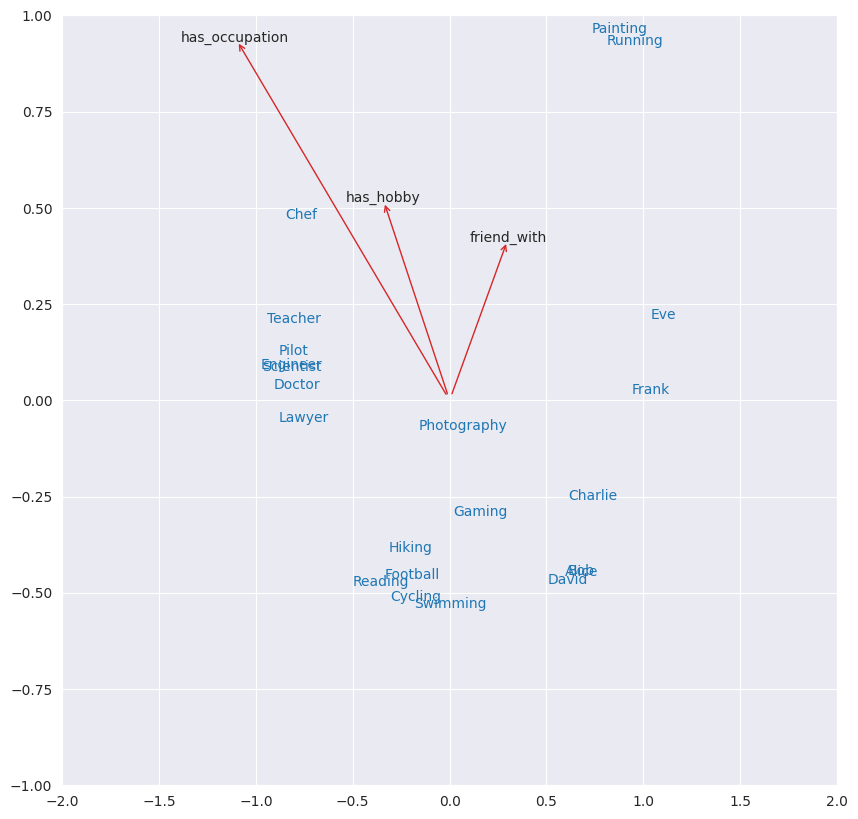

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

plt.figure(figsize=(10, 10))
pca = PCA(n_components=2)
entity_embeddings = model.entity_representations[0](indices=None).detach().numpy()
m = pca.fit(entity_embeddings)

eu = m.transform(entity_embeddings)
# plt.plot(eu[:, 0], eu[:, 1],'.b')
for i, entity in enumerate(triples_factory.entity_id_to_label):
    plt.annotate(
        text=id_to_entity[entity],
        xy=(eu[i, 0], eu[i, 1]),
        color="tab:blue",
        ha="center", va="center"
    )

    
relation_embeddings = model.relation_representations[0](indices=None).detach().numpy()
ru = pca.transform(relation_embeddings)
for i, relation in enumerate(triples_factory.relation_id_to_label):
    plt.annotate(
        text=id_to_relation[relation],
        xy=(0,0), xytext=(ru[i, 0], ru[i, 1]),
        arrowprops=dict(
            arrowstyle="<-",
            color="tab:red",
            shrinkA=5,
            shrinkB=5,
            patchA=None,
            patchB=None,
            connectionstyle="arc3,rad=0."
        )
    )

plt.xlim([-2, 2])
plt.ylim([-1, 1])
